# Manipulation de fichier .csv

In [26]:

import pandas as pd
import numpy as np
import csv

# Créons un petit DataFrame pour générer un CSV
data = {
    "id": [1, 2, 3, 4, 5],
    "nom": ["Alice", "Bob", "Charlie", "Diana", "Ethan"],
    "age": [25, 30, 35, 40, np.nan],  # un NaN pour tester les valeurs manquantes
    "ville": ["Paris", "Lyon", "Marseille", "Paris", "Lille"],
    "revenu": [3200, 4500, 5000, 3800, 4200]
}

df = pd.DataFrame(data)

# Sauvegarde en CSV
df.to_csv("exemple.csv", index=False)

print("Fichier exemple.csv créé avec succès")
print(df)


Fichier exemple.csv créé avec succès
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200


## Lire un CSV simple avec pandas

In [27]:
df = pd.read_csv("exemple.csv")

print("CSV chargé avec succès")
print(df.head())  # affiche les 5 premières lignes

CSV chargé avec succès
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200


## Écrire un CSV avec pandas

In [28]:
df.to_csv("exemple_copie.csv", index=False)  # index=False pour ne pas sauvegarder l'index
print("Données sauvegardées dans exemple_copie.csv")

Données sauvegardées dans exemple_copie.csv


## Lire un CSV avec le module standard csv

In [29]:
with open("exemple.csv", newline="", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['id', 'nom', 'age', 'ville', 'revenu']
['1', 'Alice', '25.0', 'Paris', '3200']
['2', 'Bob', '30.0', 'Lyon', '4500']
['3', 'Charlie', '35.0', 'Marseille', '5000']
['4', 'Diana', '40.0', 'Paris', '3800']
['5', 'Ethan', '', 'Lille', '4200']


## Aperçu des données (head, tail, info, describe)

In [30]:
df = pd.read_csv("exemple.csv")

print("Afficher les 5 premières lignes")
print(df.head())

print("\nAfficher les 3 dernières lignes")
print(df.tail(3))

print("\nInformations sur le DataFrame")
print(df.info())

print("\nStatistiques descriptives")
print(df.describe())  # seulement sur colonnes numériques

Afficher les 5 premières lignes
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200

Afficher les 3 dernières lignes
   id      nom   age      ville  revenu
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200

Informations sur le DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5 non-null      int64  
 1   nom     5 non-null      object 
 2   age     4 non-null      float64
 3   ville   5 non-null      object 
 4   revenu  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes
None

Statistiques descriptives
             id        age       revenu
count 

## Noms de colonnes et dimensions

In [31]:
print("Nom des colonnes :", df.columns.tolist())
print("Nombre de lignes et colonnes :", df.shape)  # (n_rows, n_cols)

print("\nAfficher uniquement la colonne 'nom'")
print(df["nom"].head())

Nom des colonnes : ['id', 'nom', 'age', 'ville', 'revenu']
Nombre de lignes et colonnes : (5, 5)

Afficher uniquement la colonne 'nom'
0      Alice
1        Bob
2    Charlie
3      Diana
4      Ethan
Name: nom, dtype: object


## Sélection de colonnes et de lignes (iloc, loc)

In [32]:
print("Sélection par indices (iloc)")
print(df.iloc[0, 0])       # première ligne, première colonne
print(df.iloc[0:3, :])     # les 3 premières lignes, toutes les colonnes

print("\nSélection par noms (loc)")
print(df.loc[0, "nom"])    # ligne 0, colonne "nom"
print(df.loc[0:2, ["nom","age"]])  # lignes 0 à 2, colonnes choisies

print("\nFiltrage avec condition")
print(df[df["ville"] == "Paris"])   # toutes les lignes où ville = Paris

Sélection par indices (iloc)
1
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000

Sélection par noms (loc)
Alice
       nom   age
0    Alice  25.0
1      Bob  30.0
2  Charlie  35.0

Filtrage avec condition
   id    nom   age  ville  revenu
0   1  Alice  25.0  Paris    3200
3   4  Diana  40.0  Paris    3800


## Gérer les valeurs manquantes

In [33]:
df = pd.read_csv("exemple.csv")

print("Valeurs manquantes par colonne :")
print(df.isna().sum())

# Supprimer les lignes avec valeurs manquantes
df_drop = df.dropna()
print("\nAprès suppression des NaN :")
print(df_drop)

# Remplacer les NaN par une valeur
df_fill = df.fillna({"age": df["age"].mean()})
print("\nAprès remplissage des NaN avec la moyenne :")
print(df_fill)

Valeurs manquantes par colonne :
id        0
nom       0
age       1
ville     0
revenu    0
dtype: int64

Après suppression des NaN :
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800

Après remplissage des NaN avec la moyenne :
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan  32.5      Lille    4200


## Renommer colonnes et index

In [34]:
df = pd.read_csv("exemple.csv")

df_renamed = df.rename(columns={"nom": "prenom", "revenu": "salaire"})
print(df_renamed.head())

   id   prenom   age      ville  salaire
0   1    Alice  25.0      Paris     3200
1   2      Bob  30.0       Lyon     4500
2   3  Charlie  35.0  Marseille     5000
3   4    Diana  40.0      Paris     3800
4   5    Ethan   NaN      Lille     4200


## Supprimer ou réorganiser colonnes

In [35]:
df = pd.read_csv("exemple.csv")

# Supprimer une colonne
df_drop = df.drop(columns=["ville"])
print("Sans colonne 'ville':")
print(df_drop.head())

# Réorganiser les colonnes
colonnes = ["nom", "age", "ville", "revenu", "id"]
df_reordered = df[colonnes]
print("\nColonnes réorganisées :")
print(df_reordered.head())

Sans colonne 'ville':
   id      nom   age  revenu
0   1    Alice  25.0    3200
1   2      Bob  30.0    4500
2   3  Charlie  35.0    5000
3   4    Diana  40.0    3800
4   5    Ethan   NaN    4200

Colonnes réorganisées :
       nom   age      ville  revenu  id
0    Alice  25.0      Paris    3200   1
1      Bob  30.0       Lyon    4500   2
2  Charlie  35.0  Marseille    5000   3
3    Diana  40.0      Paris    3800   4
4    Ethan   NaN      Lille    4200   5


## Trier les données (sort_values)

In [36]:
df = pd.read_csv("exemple.csv")

# Trier par âge croissant
print("Tri par âge croissant :")
print(df.sort_values("age"))

# Trier par revenu décroissant
print("\nTri par revenu décroissant :")
print(df.sort_values("revenu", ascending=False))

# Trier par plusieurs colonnes
print("\nTri par ville puis par âge :")
print(df.sort_values(["ville", "age"]))

Tri par âge croissant :
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200

Tri par revenu décroissant :
   id      nom   age      ville  revenu
2   3  Charlie  35.0  Marseille    5000
1   2      Bob  30.0       Lyon    4500
4   5    Ethan   NaN      Lille    4200
3   4    Diana  40.0      Paris    3800
0   1    Alice  25.0      Paris    3200

Tri par ville puis par âge :
   id      nom   age      ville  revenu
4   5    Ethan   NaN      Lille    4200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
0   1    Alice  25.0      Paris    3200
3   4    Diana  40.0      Paris    3800


## Filtrer avec conditions

In [37]:
df = pd.read_csv("exemple.csv")

# Sélectionner les personnes de plus de 30 ans
print("Plus de 30 ans :")
print(df[df["age"] > 30])

# Sélectionner les personnes vivant à Paris
print("\nVille = Paris :")
print(df[df["ville"] == "Paris"])

# Combiner plusieurs conditions (ET / OU)
print("\nAge > 30 ET revenu > 4000 :")
print(df[(df["age"] > 30) & (df["revenu"] > 4000)])

print("\nVille = Paris OU Lyon :")
print(df[df["ville"].isin(["Paris", "Lyon"])])

Plus de 30 ans :
   id      nom   age      ville  revenu
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800

Ville = Paris :
   id    nom   age  ville  revenu
0   1  Alice  25.0  Paris    3200
3   4  Diana  40.0  Paris    3800

Age > 30 ET revenu > 4000 :
   id      nom   age      ville  revenu
2   3  Charlie  35.0  Marseille    5000

Ville = Paris OU Lyon :
   id    nom   age  ville  revenu
0   1  Alice  25.0  Paris    3200
1   2    Bob  30.0   Lyon    4500
3   4  Diana  40.0  Paris    3800


## Ajouter et modifier colonnes

In [38]:
df = pd.read_csv("exemple.csv")

# Nouvelle colonne : revenu annuel
df["revenu_annuel"] = df["revenu"] * 12
print("Avec revenu annuel :")
print(df.head())

# Transformer une colonne (mettre les noms en majuscules)
df["nom"] = df["nom"].str.upper()
print("\nAvec noms en majuscules :")
print(df.head())

# Ajouter une colonne calculée conditionnelle
df["categorie_age"] = np.where(df["age"] >= 35, "senior", "junior")
print("\nAvec catégorie d'âge :")
print(df.head())

Avec revenu annuel :
   id      nom   age      ville  revenu  revenu_annuel
0   1    Alice  25.0      Paris    3200          38400
1   2      Bob  30.0       Lyon    4500          54000
2   3  Charlie  35.0  Marseille    5000          60000
3   4    Diana  40.0      Paris    3800          45600
4   5    Ethan   NaN      Lille    4200          50400

Avec noms en majuscules :
   id      nom   age      ville  revenu  revenu_annuel
0   1    ALICE  25.0      Paris    3200          38400
1   2      BOB  30.0       Lyon    4500          54000
2   3  CHARLIE  35.0  Marseille    5000          60000
3   4    DIANA  40.0      Paris    3800          45600
4   5    ETHAN   NaN      Lille    4200          50400

Avec catégorie d'âge :
   id      nom   age      ville  revenu  revenu_annuel categorie_age
0   1    ALICE  25.0      Paris    3200          38400        junior
1   2      BOB  30.0       Lyon    4500          54000        junior
2   3  CHARLIE  35.0  Marseille    5000          60000       

## GroupBy et agrégation

In [39]:
df = pd.read_csv("exemple.csv")

# Moyenne du revenu par ville
moyenne_revenu = df.groupby("ville")["revenu"].mean()
print("Moyenne du revenu par ville :")
print(moyenne_revenu)

# Plusieurs fonctions d'agrégation
stats = df.groupby("ville").agg({
    "age": "mean",
    "revenu": ["mean", "max", "min"]
})
print("\nStatistiques par ville :")
print(stats)

Moyenne du revenu par ville :
ville
Lille        4200.0
Lyon         4500.0
Marseille    5000.0
Paris        3500.0
Name: revenu, dtype: float64

Statistiques par ville :
            age  revenu            
           mean    mean   max   min
ville                              
Lille       NaN  4200.0  4200  4200
Lyon       30.0  4500.0  4500  4500
Marseille  35.0  5000.0  5000  5000
Paris      32.5  3500.0  3800  3200


## Tableaux croisés (pivot_table)

In [40]:
df = pd.read_csv("exemple.csv")

pivot = pd.pivot_table(
    df,
    values="revenu",       # ce que l'on calcule
    index="ville",         # lignes
    columns="categorie_age" if "categorie_age" in df.columns else "id",  # colonnes
    aggfunc="mean",        # fonction d'agrégation
    fill_value=0           # remplir les NaN
)
print("Tableau croisé (pivot) :")
print(pivot)

Tableau croisé (pivot) :
id              1       2       3       4       5
ville                                            
Lille         0.0     0.0     0.0     0.0  4200.0
Lyon          0.0  4500.0     0.0     0.0     0.0
Marseille     0.0     0.0  5000.0     0.0     0.0
Paris      3200.0     0.0     0.0  3800.0     0.0


## Détection et suppression des doublons

In [41]:
df = pd.read_csv("exemple.csv")

# Ajouter un doublon pour l'exemple
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)
print("Avec doublon ajouté :")
print(df)

# Détecter les doublons
print("\nDoublons détectés :")
print(df.duplicated())

# Supprimer les doublons
df_unique = df.drop_duplicates()
print("\nAprès suppression des doublons :")
print(df_unique)

Avec doublon ajouté :
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200
5   1    Alice  25.0      Paris    3200

Doublons détectés :
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Après suppression des doublons :
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200


## Fusionner deux CSV (merge, join)

In [42]:
# Créons un deuxième DataFrame exemple
df2 = pd.DataFrame({
    "id": [1, 2, 3, 6],
    "poste": ["Dev", "Analyste", "Manager", "Designer"]
})

df1 = pd.read_csv("exemple.csv")

# Jointure interne (inner join) sur 'id'
df_inner = pd.merge(df1, df2, on="id", how="inner")
print("Inner join sur 'id' :")
print(df_inner)

# Jointure externe (outer join)
df_outer = pd.merge(df1, df2, on="id", how="outer")
print("\nOuter join sur 'id' :")
print(df_outer)

# Jointure gauche (left join)
df_left = pd.merge(df1, df2, on="id", how="left")
print("\nLeft join sur 'id' :")
print(df_left)

Inner join sur 'id' :
   id      nom   age      ville  revenu     poste
0   1    Alice  25.0      Paris    3200       Dev
1   2      Bob  30.0       Lyon    4500  Analyste
2   3  Charlie  35.0  Marseille    5000   Manager

Outer join sur 'id' :
   id      nom   age      ville  revenu     poste
0   1    Alice  25.0      Paris  3200.0       Dev
1   2      Bob  30.0       Lyon  4500.0  Analyste
2   3  Charlie  35.0  Marseille  5000.0   Manager
3   4    Diana  40.0      Paris  3800.0       NaN
4   5    Ethan   NaN      Lille  4200.0       NaN
5   6      NaN   NaN        NaN     NaN  Designer

Left join sur 'id' :
   id      nom   age      ville  revenu     poste
0   1    Alice  25.0      Paris    3200       Dev
1   2      Bob  30.0       Lyon    4500  Analyste
2   3  Charlie  35.0  Marseille    5000   Manager
3   4    Diana  40.0      Paris    3800       NaN
4   5    Ethan   NaN      Lille    4200       NaN


## Concaténation verticale / horizontale (concat)

In [43]:
df1 = pd.read_csv("exemple.csv")
df2 = pd.DataFrame({
    "id": [6, 7],
    "nom": ["Fiona", "George"],
    "age": [28, 33],
    "ville": ["Nice", "Bordeaux"],
    "revenu": [4000, 3700]
})

# Concaténation verticale (ajout de lignes)
df_vert = pd.concat([df1, df2], ignore_index=True)
print("Concaténation verticale :")
print(df_vert)

# Concaténation horizontale (ajout de colonnes)
df_horiz = pd.concat([df1.reset_index(drop=True), df2[["nom","revenu"]].reset_index(drop=True)], axis=1)
print("\nConcaténation horizontale :")
print(df_horiz)

Concaténation verticale :
   id      nom   age      ville  revenu
0   1    Alice  25.0      Paris    3200
1   2      Bob  30.0       Lyon    4500
2   3  Charlie  35.0  Marseille    5000
3   4    Diana  40.0      Paris    3800
4   5    Ethan   NaN      Lille    4200
5   6    Fiona  28.0       Nice    4000
6   7   George  33.0   Bordeaux    3700

Concaténation horizontale :
   id      nom   age      ville  revenu     nom  revenu
0   1    Alice  25.0      Paris    3200   Fiona  4000.0
1   2      Bob  30.0       Lyon    4500  George  3700.0
2   3  Charlie  35.0  Marseille    5000     NaN     NaN
3   4    Diana  40.0      Paris    3800     NaN     NaN
4   5    Ethan   NaN      Lille    4200     NaN     NaN


## Lire un gros CSV par morceaux (chunksize)

In [44]:
# Créons un CSV un peu plus grand pour l'exemple
df_large = pd.DataFrame({
    "id": range(1, 1001),
    "valeur": np.random.randn(1000)
})
df_large.to_csv("large.csv", index=False)

# Lire par chunks de 200 lignes
chunk_iter = pd.read_csv("large.csv", chunksize=200)

for i, chunk in enumerate(chunk_iter):
    print(f"Chunk {i+1}")
    print(chunk.head())
    # Ici on pourrait traiter le chunk avant de passer au suivant

Chunk 1
   id    valeur
0   1 -1.459402
1   2 -0.568278
2   3  0.471286
3   4  2.338152
4   5 -1.265685
Chunk 2
      id    valeur
200  201 -3.039585
201  202  0.528412
202  203  0.476264
203  204  1.518450
204  205  2.434461
Chunk 3
      id    valeur
400  401  1.121222
401  402  0.991180
402  403  0.896026
403  404  0.791387
404  405  0.648271
Chunk 4
      id    valeur
600  601 -0.626187
601  602 -1.944009
602  603  0.684256
603  604  2.358834
604  605 -0.693727
Chunk 5
      id    valeur
800  801  0.978303
801  802 -0.703202
802  803  0.905783
803  804 -0.207351
804  805 -1.251714


## Export en d’autres formats (Excel, JSON, SQL)

In [45]:
df = pd.read_csv("exemple.csv")

# Excel
df.to_excel("exemple.xlsx", index=False)

# JSON
df.to_json("exemple.json", orient="records", lines=True)

print("Export terminé")

Export terminé


## Dates et heures (to_datetime, resample)

In [46]:
# Créons un DataFrame avec dates
df_dates = pd.DataFrame({
    "date": pd.date_range("2025-01-01", periods=10, freq="D"),
    "valeur": np.random.randint(1, 100, 10)
})

# Convertir en datetime (souvent nécessaire lors de lecture CSV)
df_dates["date"] = pd.to_datetime(df_dates["date"])
print(df_dates.dtypes)

# Indexer par date et faire un resample
df_dates.set_index("date", inplace=True)
df_resample = df_dates.resample("3D").sum()  # somme tous les 3 jours
print("\nResample tous les 3 jours :")
print(df_resample)

date      datetime64[ns]
valeur             int32
dtype: object

Resample tous les 3 jours :
            valeur
date              
2025-01-01     191
2025-01-04     136
2025-01-07     117
2025-01-10      66


## Index multi-niveaux (MultiIndex)

In [47]:
df_multi = pd.DataFrame({
    "ville": ["Paris","Paris","Lyon","Lyon"],
    "categorie_age": ["junior","senior","junior","senior"],
    "revenu": [3200, 4500, 3000, 4000]
})

df_multi.set_index(["ville","categorie_age"], inplace=True)
print("DataFrame avec MultiIndex :")
print(df_multi)

# Sélection par niveau
print("\nSélection Paris :")
print(df_multi.loc["Paris"])

DataFrame avec MultiIndex :
                     revenu
ville categorie_age        
Paris junior           3200
      senior           4500
Lyon  junior           3000
      senior           4000

Sélection Paris :
               revenu
categorie_age        
junior           3200
senior           4500


## Histogrammes et courbes directement depuis pandas

<Axes: title={'center': 'Scatter Age vs Revenu'}, xlabel='age', ylabel='revenu'>

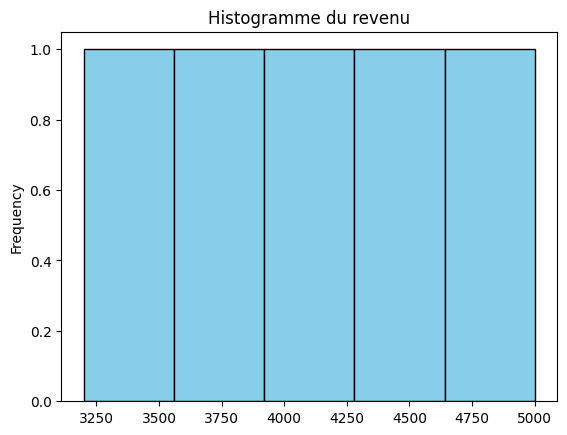

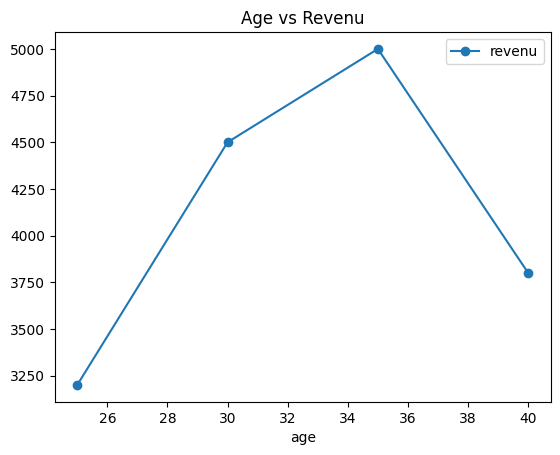

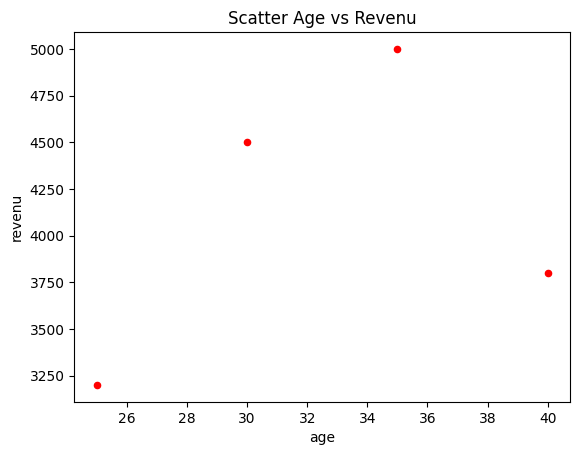

In [48]:
df = pd.read_csv("exemple.csv")

# Histogramme du revenu
df["revenu"].plot(kind="hist", bins=5, color="skyblue", edgecolor="black", title="Histogramme du revenu")

# Courbe simple : âge vs revenu
df.plot(x="age", y="revenu", kind="line", marker="o", title="Age vs Revenu")

# Scatter plot
df.plot(x="age", y="revenu", kind="scatter", color="red", title="Scatter Age vs Revenu")

## Heatmap de corrélation avec seaborn

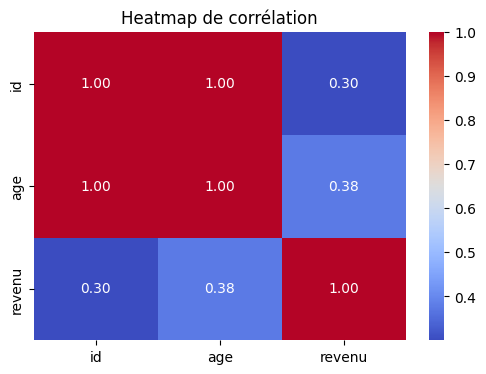

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("exemple.csv")

# Calcul de la corrélation
corr = df.corr(numeric_only=True)  # uniquement les colonnes numériques

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de corrélation")
plt.show()

## Cheat Sheet CSV / pandas

DataFrame initial:
    id      nom  age  revenu      ville
0   1    Alice   25    3200      Paris
1   2      Bob   30    4500       Lyon
2   3  Charlie   35    5000  Marseille

Lecture CSV:
    id      nom  age  revenu      ville
0   1    Alice   25    3200      Paris
1   2      Bob   30    4500       Lyon
2   3  Charlie   35    5000  Marseille

Premières lignes:
    id      nom  age  revenu      ville
0   1    Alice   25    3200      Paris
1   2      Bob   30    4500       Lyon
2   3  Charlie   35    5000  Marseille

Dernières lignes:
    id      nom  age  revenu      ville
0   1    Alice   25    3200      Paris
1   2      Bob   30    4500       Lyon
2   3  Charlie   35    5000  Marseille

Info colonnes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3 non-null      int64 
 1   nom     3 non-null      object
 2   age     3 non-null      int64 
 3  

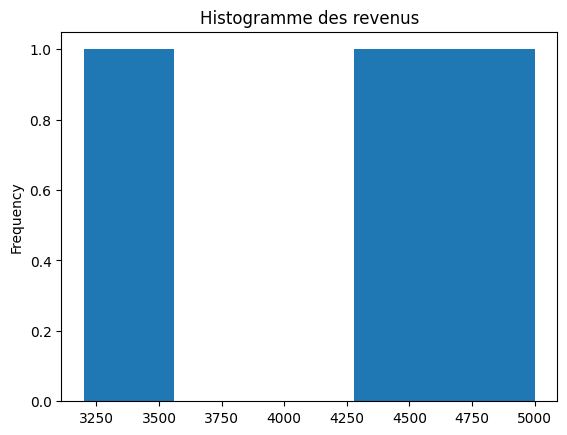

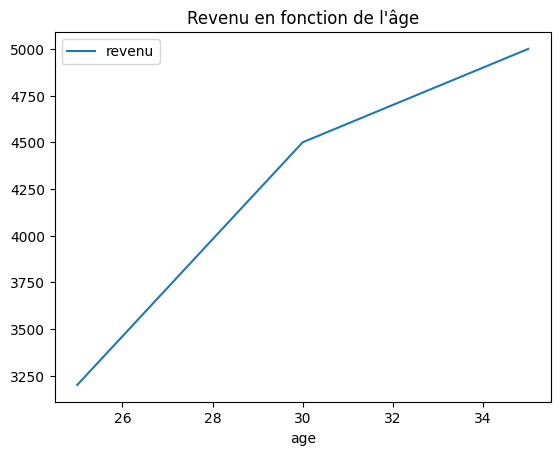

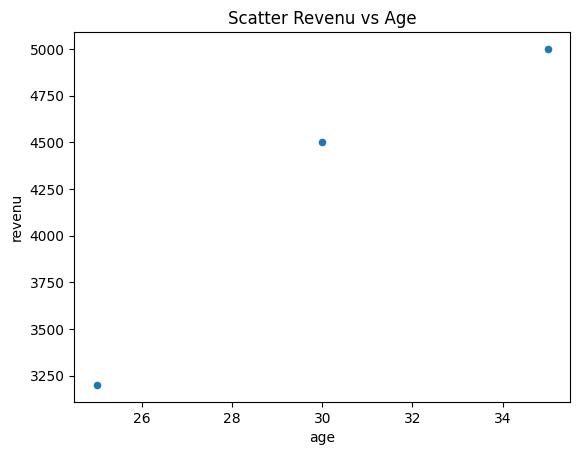

In [50]:
import pandas as pd
import numpy as np

# ==============================
# 1. Création d'un DataFrame
# ==============================
df = pd.DataFrame({
    "id": [1,2,3],
    "nom": ["Alice","Bob","Charlie"],
    "age": [25,30,35],
    "revenu": [3200, 4500, 5000],
    "ville": ["Paris","Lyon","Marseille"]  # ajout de la colonne ville
})
print("DataFrame initial:\n", df)

# ==============================
# 2. Lire / écrire CSV
# ==============================
df.to_csv("fichier.csv", index=False)      
df2 = pd.read_csv("fichier.csv")           
print("\nLecture CSV:\n", df2)

# ==============================
# 3. Aperçu et exploration
# ==============================
print("\nPremières lignes:\n", df.head())
print("\nDernières lignes:\n", df.tail(3))
print("\nInfo colonnes:\n")
df.info()
print("\nStatistiques:\n", df.describe())
print("\nDimensions:", df.shape)
print("\nColonnes:", df.columns)

# ==============================
# 4. Sélection et filtrage
# ==============================
print("\nColonne 'nom':\n", df["nom"])
print("\nColonnes 'nom' et 'age':\n", df[["nom","age"]])
print("\nCellule (0,1):", df.iloc[0,1])
print("\nCellule label (0,'nom'):", df.loc[0,"nom"])
print("\nFiltrer age>30:\n", df[df["age"]>30])
print("\nFiltrer villes Paris ou Lyon:\n", df[df["ville"].isin(["Paris","Lyon"])])

# ==============================
# 5. Nettoyage
# ==============================
print("\nSupprimer NaN:\n", df.dropna())
print("\nRemplir NaN par 0:\n", df.fillna(0))
print("\nRenommer colonne nom -> prenom:\n", df.rename(columns={"nom":"prenom"}))
print("\nSupprimer colonne 'revenu':\n", df.drop(columns=["revenu"]))
print("\nRemplir NaN dans 'age' par la moyenne:\n", df["age"].fillna(df["age"].mean()))

# ==============================
# 6. Trier et modifier
# ==============================
print("\nTri par age:\n", df.sort_values("age"))
print("\nTri par ville puis age (desc):\n", df.sort_values(["ville","age"], ascending=[True,False]))
df["revenu_annuel"] = df["revenu"]*12
df["categorie"] = np.where(df["age"]>30,"senior","junior")
print("\nDataFrame avec revenus annuels et catégorie:\n", df)

# ==============================
# 7. GroupBy et pivot
# ==============================
print("\nMoyenne revenu par ville:\n", df.groupby("ville")["revenu"].mean())
print("\nAggregations:\n", df.groupby("ville").agg({"age":"mean","revenu":["mean","max"]}))
pivot = pd.pivot_table(df, values="revenu", index="ville", columns="categorie", aggfunc="mean", fill_value=0)
print("\nPivot table:\n", pivot)

# ==============================
# 8. Doublons
# ==============================
print("\nDoublons:\n", df.duplicated())
print("\nSupprimer doublons:\n", df.drop_duplicates())

# ==============================
# 9. Fusion / concaténation
# ==============================
df1 = pd.DataFrame({"id":[1,2],"nom":["Alice","Bob"]})
df2b = pd.DataFrame({"id":[1,3],"poste":["Dev","Manager"]})
print("\nMerge df1 et df2b:\n", pd.merge(df1, df2b, on="id", how="inner"))
print("\nConcat vertical df1 et df2b:\n", pd.concat([df1, df2b], ignore_index=True))
print("\nConcat horizontal df1 et df2b:\n", pd.concat([df1, df2b], axis=1))

# ==============================
# 10. Cas avancés
# ==============================
# lire par morceaux (exemple)
# chunks = pd.read_csv("large.csv", chunksize=200)
df.to_excel("fichier.xlsx", index=False)  
df.to_json("fichier.json", orient="records", lines=True)
print("\nExport Excel et JSON réalisés")

# ==============================
# 11. Dates
# ==============================
df_dates = pd.DataFrame({"date":["2025-01-01","2025-01-02"], "valeur":[10,20]})
df_dates["date"] = pd.to_datetime(df_dates["date"])
df_dates.set_index("date", inplace=True)
print("\nDates resample:\n", df_dates.resample("D").sum())

# ==============================
# 12. Visualisation rapide
# ==============================
import matplotlib.pyplot as plt

df["revenu"].plot(kind="hist", bins=5, title="Histogramme des revenus")
plt.show()

df.plot(x="age", y="revenu", kind="line", title="Revenu en fonction de l'âge")
plt.show()

df.plot(x="age", y="revenu", kind="scatter", title="Scatter Revenu vs Age")
plt.show()
